In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix

183
183


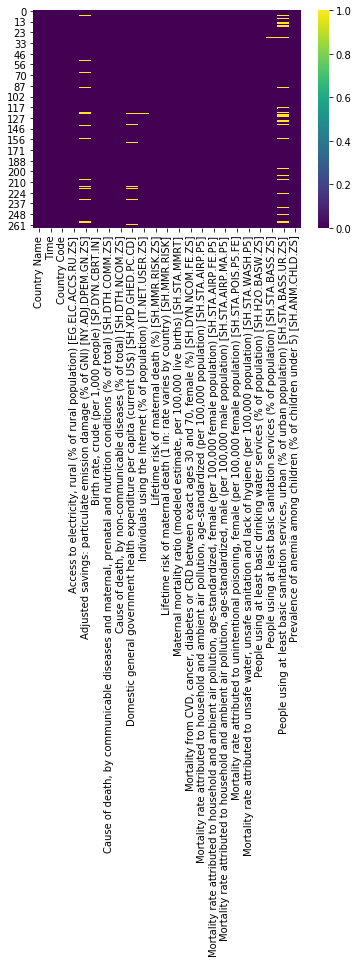

In [2]:
world = pd.read_csv("world.csv")
life = pd.read_csv('life.csv')

for index, row in world.iterrows():
    if not (row['Country Code'] in list(life['Country Code'])):
        #print(row['Country Name'])
        world.drop(index, inplace=True)
print(len(life))
print(len(world))

features = world.columns[3:]
sns.heatmap(world=="..", cmap="viridis")

In [3]:
world_link = world[['Country Name', 'Time', 'Country Code']]
world.drop(['Country Name', 'Time', 'Country Code'], axis = 1, inplace=True)

In [5]:
world = world.replace("..", np.nan)

In [6]:
scaler = StandardScaler()
scaler.fit(world)
scaled_features = scaler.transform(world)
scaled_features_df = pd.DataFrame(scaled_features)
scaled_features_df.head()

C:\Users\jaypr\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jaypr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.624987,2.962369,1.270002,0.698531,-1.129031,-0.559320,-1.301676,2.064480,-0.566782,2.141573,2.099678,1.657252,1.611964,1.661690,1.104742,0.067469,-1.339529,-1.088556,-0.713445,0.543931
1,0.707983,-0.609844,-0.912459,-0.956162,1.115215,-0.412453,0.635058,-0.560413,0.020278,-0.628556,-0.530753,-0.337515,-0.380631,-0.304145,-0.516058,-0.592508,0.262404,0.809717,0.816210,-0.638900
2,0.707213,-0.691572,0.399947,-0.368375,0.318279,-0.413709,-0.187122,-0.286917,-0.528391,-0.219572,-0.512736,-0.592611,-0.537192,-0.665217,-0.299951,-0.510613,0.411937,0.463067,0.472704,-0.358322
3,-2.153339,0.348109,2.057346,2.032165,-1.893906,-0.526599,-1.238480,0.610731,-0.560863,0.341200,-0.008270,0.366438,0.501804,0.204030,1.212795,1.748726,-1.890938,-0.864322,-0.577298,0.791500
4,0.707983,NaN,-0.550028,-0.511618,0.597665,-0.300907,0.868061,-0.515631,-0.379626,-0.514715,0.712396,-0.868617,-0.821848,-0.905931,-0.516058,-0.597326,0.605084,0.461769,NaN,-0.231786


In [9]:
scaled_features_df.columns = features
X = scaled_features_df.replace(np.nan, 0)
y = life['Life expectancy at birth (years)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

In [10]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)
pred5 = knn5.predict(X_test)
print(confusion_matrix(y_test, pred5))
print(classification_report(y_test, pred5))

[[15  7  9]
 [ 8  6  5]
 [ 6  3  2]]
              precision    recall  f1-score   support

        High       0.52      0.48      0.50        31
         Low       0.38      0.32      0.34        19
      Medium       0.12      0.18      0.15        11

   micro avg       0.38      0.38      0.38        61
   macro avg       0.34      0.33      0.33        61
weighted avg       0.40      0.38      0.39        61



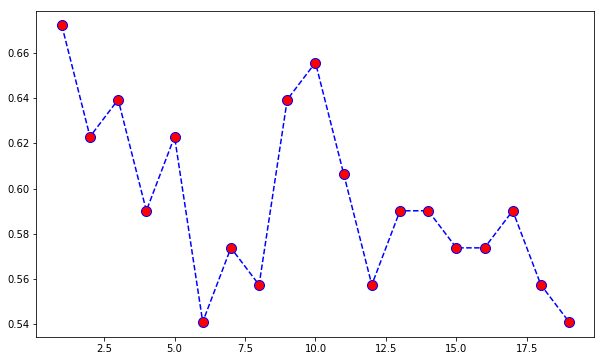

In [11]:
errors = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    errors.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,20), errors,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)